## 生存時間分析（生存時間解析）とは
「イベントが発生するまでの時間」について分析する手法の総称

病気の発症までの時間、システム故障までの時間、自社サービスのユーザ離脱までの時間、etc...


## 大きく分けて3種類
### 1.パラメトリックモデル
生存時間（継続時間）に最も影響を与える要因が知りたい！　※生存時間が何かしらの確率分布に従うと仮定する場合

### 2.セミパラメトリックモデル
生存時間（継続時間）に最も影響を与える要因が知りたい！　※生存時間が従う確率分布を仮定しない場合

### 3.ノンパラメトリックモデル
2つの生存率に有意差があるか知りたい！

In [1]:
#データ、ライブラリ読み込み
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

df_users = pd.read_csv("9-5_lifelines.csv",index_col="氏名")

In [3]:
#ダミー変数化
df_users["性別"] = pd.get_dummies(df_users["性別"])["男性"]

<AxesSubplot:xlabel='timeline'>

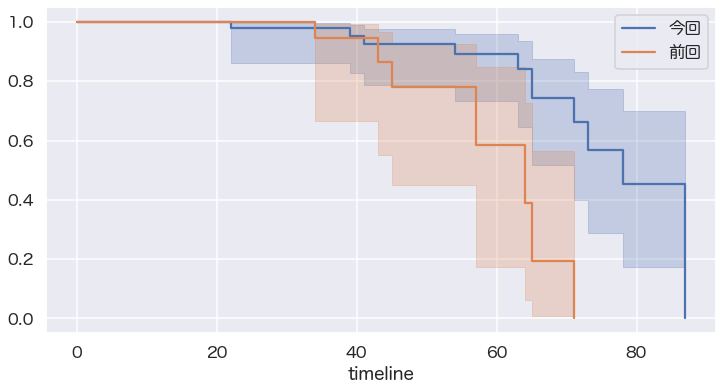

In [11]:
#カプランマイヤー曲線の描画
from lifelines import KaplanMeierFitter

sns.set(context="talk",font="Hiragino Maru Gothic Pro")
fig = plt.subplots(figsize=(12,6))

kmf = KaplanMeierFitter()
kmf.fit(durations=df_users["継続期間"], event_observed=df_users["打ち切り"])
kmf.plot(label="今回")
kmf.fit(durations=df_users_past["継続期間"], event_observed=df_users_past["打ち切り"])
kmf.plot(label="前回")


In [7]:
#セミパラメトリックモデル（cox比例ハザードモデル）
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df_users.drop(["性別","年齢"],axis=1), duration_col="継続期間", event_col="打ち切り")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 52 total observations, 41 right-censored observations>
             duration col = '継続期間'
                event col = '打ち切り'
      baseline estimation = breslow
   number of observations = 52
number of events observed = 11
   partial log-likelihood = -26.33
         time fit was run = 2021-09-18 06:41:16 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
スマホ使用時間/日  -0.49       0.61       0.22            -0.91            -0.06                 0.40                 0.94

              z    p   -log2(p)
covariate                      
スマホ使用時間/日 -2.26 0.02       5.38
---
Concordance = 0.79
Partial AIC = 54.66
log-likelihood ratio test = 4.61 on 1 df
-log2(p) of ll-ratio test = 4.98

In [10]:
#ノンパラメトリック（ログランク検定）
from lifelines.statistics import logrank_test

df_users_past = pd.read_csv("9-5_lifelines2.csv",index_col="氏名")

results = logrank_test(df_users["継続期間"], df_users_past["継続期間"], df_users["打ち切り"], df_users_past["打ち切り"])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.84 0.01      7.61